<a href="https://colab.research.google.com/github/NohanJoemon/SummerSchool-Assignment/blob/main/Nohan_ch19b072/2_opencv_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NohanJoemon/SummerSchool-Assignment
%cd SummerSchool-Assignment/Nohan_ch19b072

# Question 1

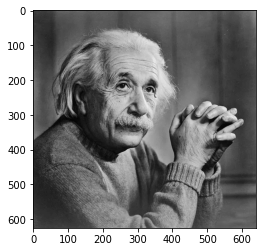

In [17]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('media/einstein.jpg',0)
plt.imshow(img,cmap='gray')

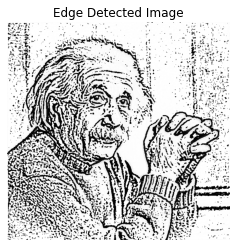

In [18]:

blur_gaus1 = cv2.GaussianBlur(img,(5,5),3)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),4)
edge_detector = blur_gaus2 - blur_gaus1

#Plotting the images
plt.figure(),plt.axis("off"),plt.title("Edge Detected Image"),plt.imshow(edge_detector,cmap="gray")
plt.show()

# Question 2

In [19]:
pip install pafy

In [20]:
pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 2.9MB/s 


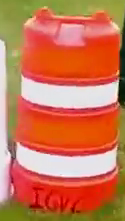

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# target image
interest_image=cv2.imread("/content/SummerSchool-Assignment/Nohan_ch19b072/media/barrel.jpg",1)

# converting to hsv
interest_image_hsv=cv2.cvtColor(interest_image,cv2.COLOR_BGR2HSV)

cv2_imshow(interest_image)


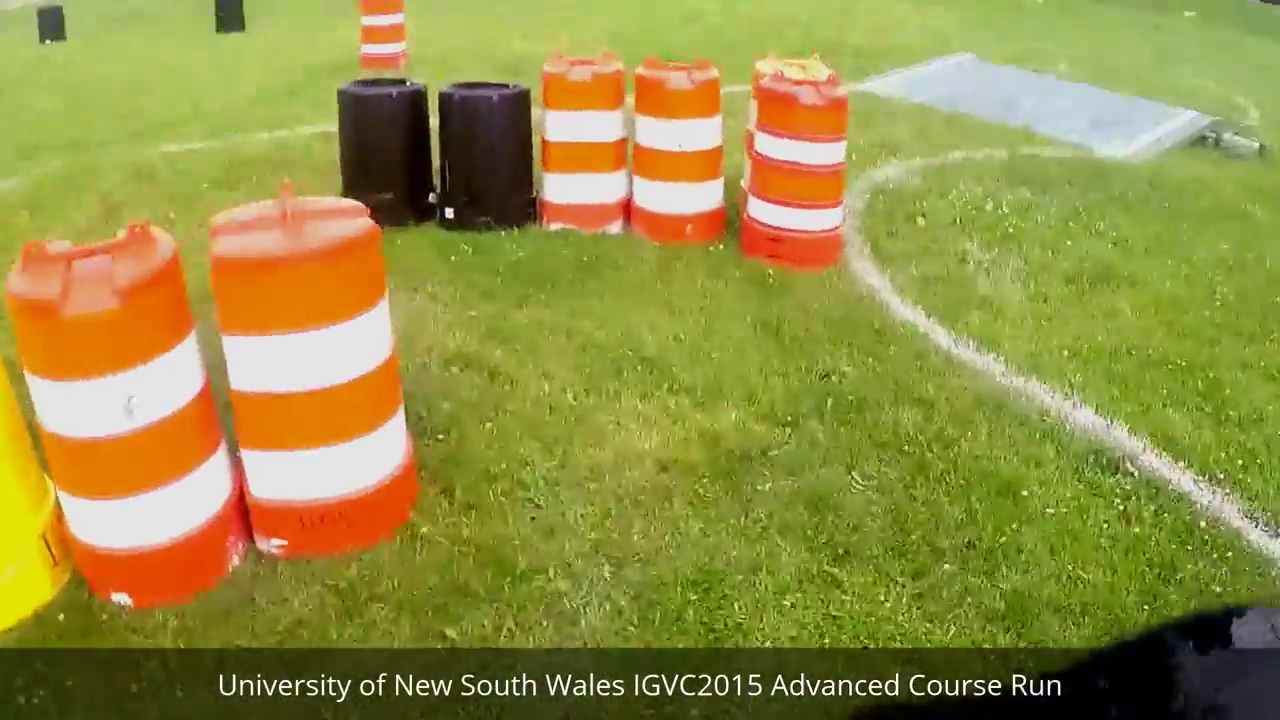

In [22]:

import cv2, pafy

url   = "https://www.youtube.com/watch?v=A9BVr7kltl8"
video = pafy.new(url)
best  = video.getbest(preftype="mp4")

capture = cv2.VideoCapture(best.url)
capture.set(cv2.CAP_PROP_POS_MSEC, 44000)
check, frame = capture.read()

# converting to hsv
frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


cv2_imshow(frame)

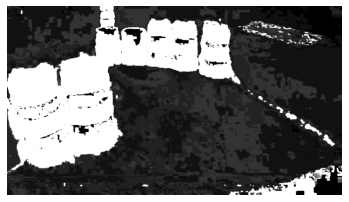

In [23]:


# histogram and normalization
interest_image_hist = cv2.calcHist([interest_image_hsv],[0], None, [100], [0,256] )
interest_image_norm=cv2.normalize(interest_image_hist,None,0,255,cv2.NORM_MINMAX)


res = cv2.calcBackProject([frame_hsv],[0,1],interest_image_norm,[0,180,0,256],1)

disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
plt.axis('off')
plt.imshow(cv2.filter2D(res, -1, disc, res),cmap="gray")

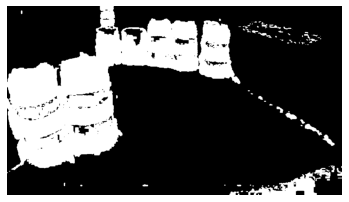

In [24]:
ret,thresh = cv2.threshold(res,170,255,0)
final = cv2.merge((thresh, thresh, thresh))
plt.axis('off')
plt.imshow(final,cmap="gray")

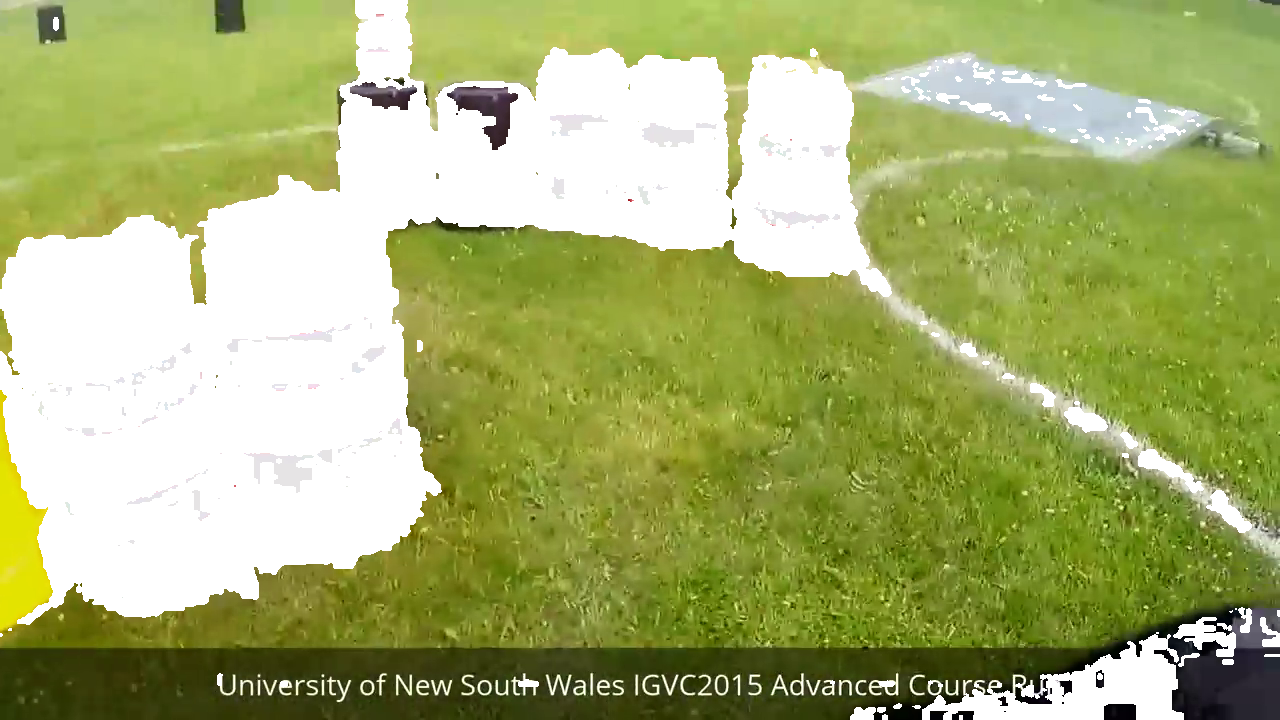

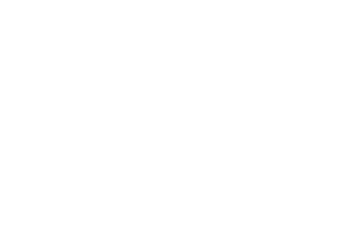

In [25]:
result = cv2.bitwise_or(frame, final)
plt.axis('off')
cv2_imshow(result)